In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('../data/data.csv')
x = data.drop(columns=['label'])
y = data['label']

In [3]:
def display_importances(imp, names):
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(len(names)), imp)
    plt.yticks(range(len(names)), names)
    plt.show()

In [4]:
features_names = ['characters_count', 'and_or', 'blank_line', 'capital_start', 'end_dot', 'imperative_start', 'wrap_to_72',
                  'verb_obj_conn', 'changed_files_count', 'changes_methods_count', 'files_to_body_ratio',
                  'methods_to_body_ratio', 'methods_long', 'methods_complexity', 'methods_parameters',
                  'added_lines', 'removed_lines']

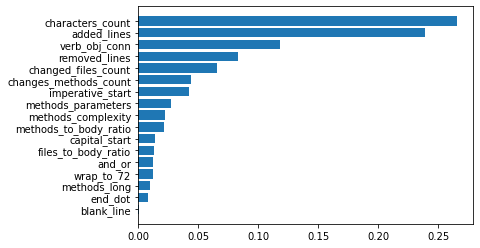

In [5]:
clf = DecisionTreeClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

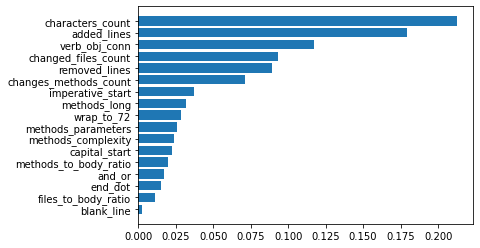

In [6]:
clf = RandomForestClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

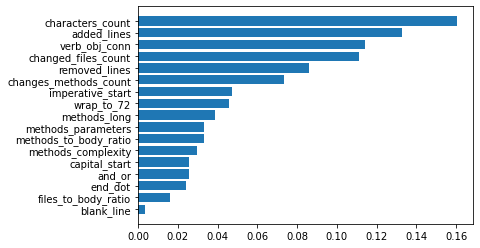

In [7]:
clf = ExtraTreesClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

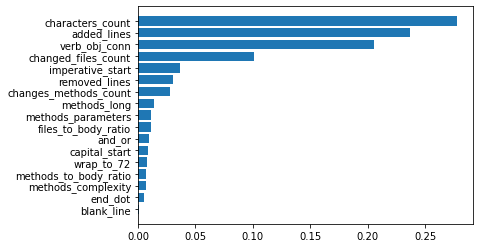

In [8]:
clf = GradientBoostingClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

DecisionTreeClassifier: [highest 0.78] [accuracy 0.71] [time 0.56]

RandomForestClassifier: [highest 0.86] [accuracy 0.77] [time 15.11]

ExtraTreesClassifier: [highest 0.8] [accuracy 0.74] [time 13.71]

GradientBoostingClassifier: [highest 0.84] [accuracy 0.77] [time 38.41]

In [9]:
data1 = data.drop(columns=['files_to_body_ratio', 'methods_to_body_ratio', 'methods_long', 'methods_complexity', 'methods_parameters'])
print(data1.groupby('label').mean())

         characters_count    and_or  blank_line  capital_start   end_dot  \
label                                                                      
bad             52.138158  0.769737    0.957237       0.582237  0.792763   
good            36.275058  0.951049    0.990676       0.792541  0.806527   
neutral         38.134831  0.891386    0.970037       0.644195  0.764045   

         imperative_start  wrap_to_72  verb_obj_conn  changed_files_count  \
label                                                                       
bad              0.384868    0.621711       0.529605             8.598684   
good             0.785548    0.895105       0.976690             2.055944   
neutral          0.602996    0.786517       0.794007             3.348315   

         changes_methods_count  added_lines  removed_lines  
label                                                       
bad                  14.845395   441.546053     185.753289  
good                  2.202797    23.284382      1

In [11]:
data = data[data.methods_complexity  != -1]
print(data.groupby('label')['methods_complexity'].mean())

label
bad        0.869508
good       0.919628
neutral    0.878938
Name: methods_complexity, dtype: float64


In [12]:
data = data[data.methods_parameters != -1]
print(data.groupby('label')['methods_parameters'].mean())

label
bad        0.828683
good       0.939212
neutral    0.845000
Name: methods_parameters, dtype: float64


In [13]:
data = data[data.methods_long != -1]
print(data.groupby('label')['methods_long'].mean())

label
bad        0.739295
good       0.860075
neutral    0.731429
Name: methods_long, dtype: float64
